In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
college = pd.read_csv('E:\Downloads\College.csv')

college2 = college.rename({'Unnamed: 0': 'College'}, axis = 1)
college2 = college2.set_index('College')

college = college2

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\aryst\AppData\Local\Temp\ipykernel_29772\4280269649.py:1: SyntaxWarning: invalid escape sequence '\D'
  college = pd.read_csv('E:\Downloads\College.csv')


In [5]:
college2.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


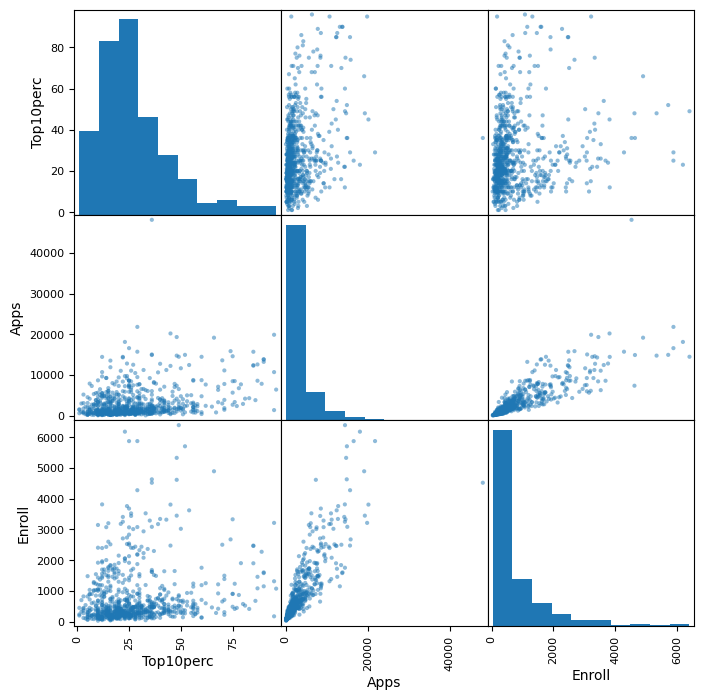

In [6]:
pd.plotting.scatter_matrix(
    college[['Top10perc', 'Apps', 'Enroll']],
    figsize = (8,8)
)
plt.show()

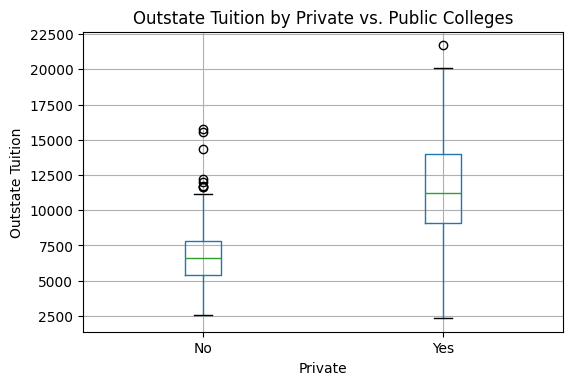

In [ ]:
college.boxplot(column = 'Outstate', by = 'Private', figsize = (6, 4))
plt.title('Outstate Tuition by Private vs. Public Colleges')
plt.suptitle('')
plt.ylabel('Outstate Tuition')
plt.show()

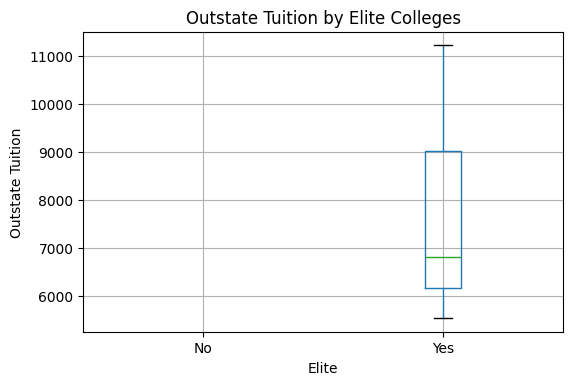

In [11]:
college['Elite'] = pd.cut(college['Top10perc'], [0, 0.5, 1], labels = ['No', 'Yes'])
college['Elite'].value_counts()

college.boxplot(column = 'Outstate', by = 'Elite', figsize = (6, 4))
plt.title('Outstate Tuition by Elite Colleges')
plt.suptitle('')
plt.ylabel('Outstate Tuition')
plt.show()

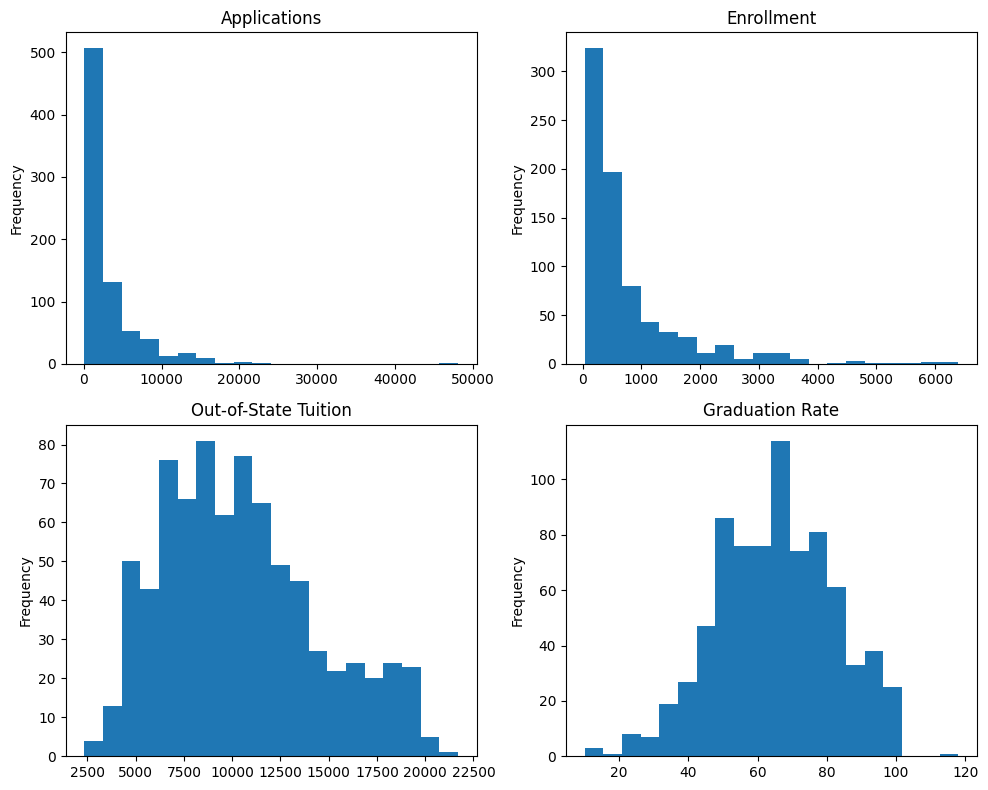

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

college['Apps'].plot.hist(bins=20, ax=axes[0,0], title='Applications')
college['Enroll'].plot.hist(bins=20, ax=axes[0,1], title='Enrollment')
college['Outstate'].plot.hist(bins=20, ax=axes[1,0], title='Out-of-State Tuition')
college['Grad.Rate'].plot.hist(bins=20, ax=axes[1,1], title='Graduation Rate')

plt.tight_layout()
plt.show()


Maximum Graduation Rate: 118
Maximum Outstate Tuition: 21700


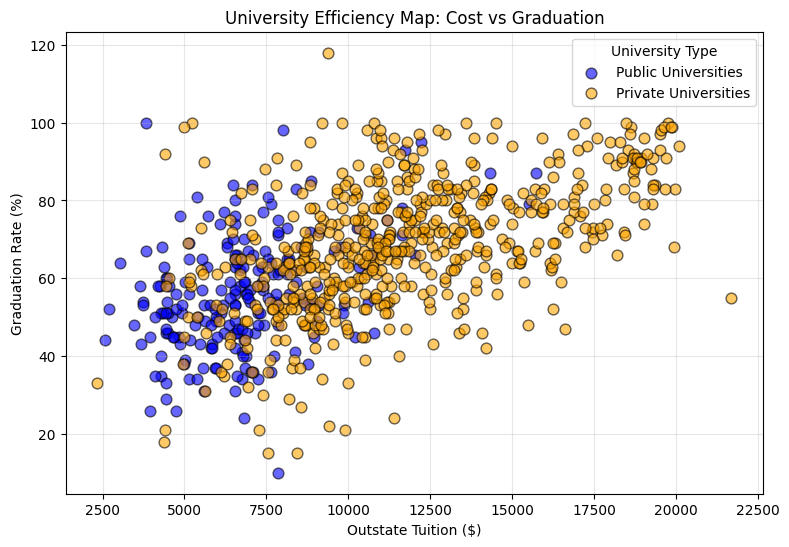

In [57]:
plt.figure(figsize=(9,6))

maxgr = college['Grad.Rate'].max()
maxcost = college['Outstate'].max()
print ("Maximum Graduation Rate:", maxgr)
print ("Maximum Outstate Tuition:", maxcost)


college[college['Private'] == 'No'].plot.scatter(
    x='Outstate',
    y='Grad.Rate',
    s=60,
    color='blue',
    alpha=0.6,
    edgecolor='black',
    label='Public Universities',
    ax=plt.gca()
)

college[college['Private'] == 'Yes'].plot.scatter(
    x='Outstate',
    y='Grad.Rate',
    s=60,
    color='orange',
    alpha=0.6,
    edgecolor='black',
    label='Private Universities',
    ax=plt.gca()
)

plt.xlabel('Outstate Tuition ($)')
plt.ylabel('Graduation Rate (%)')
plt.title('University Efficiency Map: Cost vs Graduation')
plt.grid(alpha=0.3)
plt.legend(title='University Type')

plt.show()
